In [1]:
import cv2

In [2]:
import numpy as np

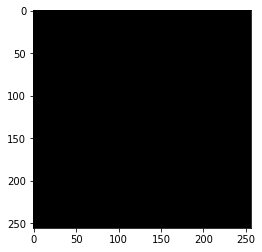

In [15]:
import matplotlib.pyplot as plt

img = np.zeros((256, 256, 3))

plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


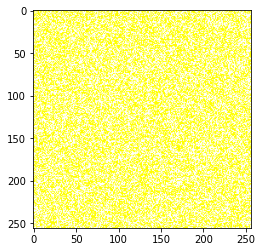

In [30]:
yellow_color = (255, 255, 0)

for i in range(256):
    for j in range(256):
        randint = np.random.randint(240, 255)
        yellow_color = (randint, randint, np.random.randint(0, 2))
        img[i, j, :] = yellow_color
        
plt.imshow(img)

In [33]:
block_position = []

block_number = np.random.randint(1, 10)

for _ in range(block_number):
    leftdown = (np.random.randint(0, 254), np.random.randint(0, 254))
    rightup = (np.random.randint(leftdown[0]+1, 256), np.random.randint(leftdown[0]+1, 256))
    block_position.append((leftdown, rightup))


print(block_position)

[((193, 197), (245, 249)), ((219, 242), (233, 231))]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[((176, 10), (237, 197)), ((176, 42), (219, 173)), ((68, 63), (158, 252)), ((48, 157), (86, 174)), ((191, 91), (225, 207)), ((163, 23), (164, 199)), ((140, 230), (243, 254)), ((125, 76), (128, 78)), ((129, 42), (163, 125))]


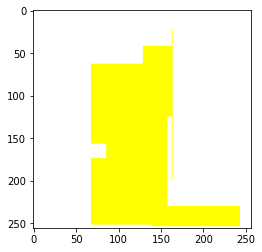

In [68]:
background_img = np.ones((256, 256, 3))

block_position = []

block_number = np.random.randint(5, 10)

for _ in range(block_number):
    leftup = (np.random.randint(0, 254), np.random.randint(0, 254))
    rightdown = (np.random.randint(leftup[0]+1, 256), np.random.randint(leftup[1]+1, 256))
    block_position.append((leftup, rightdown))
    
print(block_position)

for leftup, rightdown in block_position:
    leftx, rightx = leftup[0], rightdown[0]
    upy, downy = leftup[1], rightdown[1]
    
    randint = np.random.randint(240, 255)
    yellow_color = np.array((randint, randint, np.random.randint(0, 3)))
    
#     background_img[downy, leftx, :] = yellow_color
#     background_img[upy, rightx, :] = yellow_color
    
#     print(leftup, rightdown)
    
    background_img[upy:downy, leftx:rightx, :] = yellow_color
    
plt.imshow(background_img)

In [99]:
import random

def make_yellow_block(min_, max_):
    background_img = np.zeros((256, 256, 3))

    block_position = []

    block_number = np.random.randint(min_, max_)
    
    yellow_color = [(1, 1, 0), (1, 0.9529, 0.5019), (1, 0.898, 0.7058), (1, 0.8588, 0.345), (1, 0.9098, 0.4862)]

    for _ in range(block_number):
        leftup = (np.random.randint(0, 254), np.random.randint(0, 254))
        rightdown = (np.random.randint(leftup[0]+1, 256), np.random.randint(leftup[1]+1, 256))
        block_position.append((leftup, rightdown))

    for leftup, rightdown in block_position:
        leftx, rightx = leftup[0], rightdown[0]
        upy, downy = leftup[1], rightdown[1]

        background_img[upy:downy, leftx:rightx, :] = random.choice(yellow_color)
    
    rainbow = [(1, 0, 0), (1, 0.498, 0), (0, 1, 0), (0, 0, 1), (0.2941, 0, 0.5098), (0.5803, 0, 0.8274)]
    
    for i in range(256):
        for j in range(256):
            if background_img[i, j, 0] == 0.:
                background_img[i, j, :] = random.choice(rainbow)
                
                
    label = np.zeros((256, 256))
    for leftup, rightdown in block_position:
        leftx, rightx = leftup[0], rightdown[0]
        upy, downy = leftup[1], rightdown[1]

        label[upy:downy, leftx:rightx] = 1.
    
    
    return background_img, label

In [100]:
random_dataset, label = make_yellow_block(5, 10)

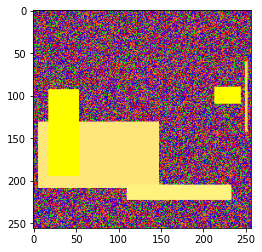

In [101]:
plt.imshow(random_dataset)

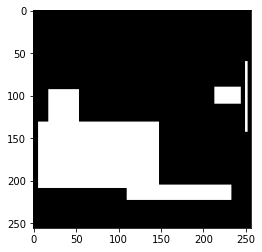

In [105]:
plt.imshow(label, cmap="gray")

In [112]:
import matplotlib.image as mpimg

In [114]:
for i in range(300):
    x, y = make_yellow_block(2, 10)
    mpimg.imsave(f"./trainset/x/({i}).png", x)
    mpimg.imsave(f"./trainset/y/({i}).png", y)

In [115]:
for i in range(50):
    x, y = make_yellow_block(2, 10)
    mpimg.imsave(f"./testset/x/({i}).png", x)
    mpimg.imsave(f"./testset/y/({i}).png", y)